In [1]:
%matplotlib inline

In [2]:
from clawpack.geoclaw import dtopotools
import numpy as np

In [3]:
# add two subfaults

#subfault0
subfault0 = dtopotools.SubFault()
subfault0.slip = 1.
subfault0.coordinate_specification = 'triangular'
subfault0._corners = [[2.5,1.9,-10e3],[1.9,2.5,-11e3],[2.5,2.5,-10e3]]
subfault0.calculate_geometry_triangles()
subfault0.rake = 270.

In [4]:
subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [[.5,0.,-1e3],[0.,.5,-1e3],[.5,.5,0.]]
subfault1.calculate_geometry_triangles()

In [5]:
subfault0.corners

[[2.5, 1.9, -10000.0], [1.9, 2.5, -11000.0], [2.5, 2.5, -10000.0]]

In [6]:
from numpy import pi

# subfault0._get_halfspace_coords?
x = np.array([[0.,0.,1.]])
subfault0._get_halfspace_coords(x,np.pi/2.,np.pi/3,0,0,10)

(array([[ 0.,  0., -9.]]),
 array([[ 0.,  0.,  0.]]),
 array([[  0.,   0.,  11.]]),
 array([[ 0.,  0.,  0.]]))

In [7]:
subfault0._get_angular_params()

0.99999964
-0.99999982
0.0


[0.00084852793381536191, 0.00059999992798065449, 1.5707963267948966]

In [10]:
0.5**2 + 0.8660254**2

0.9999999934451599

In [4]:
# choose number of Gaussian quadrature points
subfault0.n_gauss_pts = 20
subfault1.n_gauss_pts = 40

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


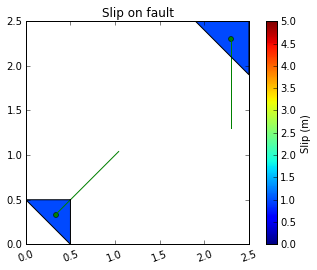

In [5]:
fault0 = dtopotools.Fault(subfaults=[subfault0,subfault1])

fault0.plot_subfaults(slip_color=True,plot_rake=True,cmin_slip=0.,cmax_slip=5.)

In [6]:
print fault0.Mw()
print subfault0.length * subfault0.width * (dtopotools.LAT2METER)**2

7.41866535319
2.7445291166e+19


In [7]:
subfault0.rake * dtopotools.DEG2RAD / np.pi

NameError: name 'np' is not defined

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


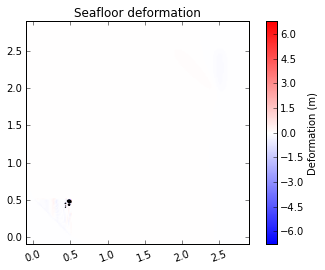

In [8]:
# generate dtopo
x,y = fault0.create_dtopo_xy(buffer_size=0.1)
dtopo = fault0.create_dtopography(x,y,times=[0.])

# plot deformation dZ at time 0.
dtopo.plot_dZ_colors(0.)

In [17]:
import numpy as np

In [9]:
x = np.linspace(-1.,1.,200)
y = np.linspace(-1.,1.,200)

Dtopo = subfault0.okada(x,y)

21833213081.4


In [15]:
print subfault0.dtopo.dZ[0,:,:].shape
print subfault0.slip
print subfault0.dip

(200, 200)
10.0
45.0


In [16]:
dtopotools.LAT2METER

111133.84012073894

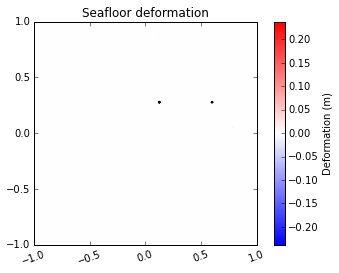

In [17]:
import matplotlib.pyplot as pl

# pl.pcolor(Dtopo.X,Dtopo.Y,Dtopo.dZ[0,:,:])
# pl.colorbar()

Dtopo.plot_dZ_colors(0.)

In [12]:
x,w = subfault0.gauss_pts

In [13]:
np.array?

In [ ]:
slab_pts = np.loadtxt('cas_slab1.0_clip.xyz')

In [ ]:
from scipy.spatial import Delaunay

tri = Delaunay(slab_pts[:,0:2])


In [ ]:
I = np.invert(np.isnan(slab_pts[:,2]))
c4e = []
for j in range(tri.nsimplex):
    node_list = tri.simplices[j,:].tolist()
    if I[node_list[0]] and I[node_list[1]] and I[node_list[2]] :
        c1 = slab_pts[node_list[0],:].tolist()
        c2 = slab_pts[node_list[1],:].tolist()
        c3 = slab_pts[node_list[2],:].tolist()
        if (c2[1] > 49.7) and (c2[0] > -125.):
            c4e.append([c1,c2,c3])

In [ ]:
import copy

subfaults = []



# j = 20

# subfault0 = dtopotools.SubFault()
# subfault0.coordinate_specification = 'triangular'
# subfault0.slip = 5.
# subfault0._corners = c4e[j]
# subfault0.calculate_geometry_triangles()
# subfaults.append(copy.copy(subfault0))

# N = min([100,len(c4e)])
N = len(c4e)
for j in range(N):
    subfault0 = dtopotools.SubFault()
    subfault0.coordinate_specification = 'triangular'
    subfault0.slip = 5.
    subfault0._corners = c4e[j]
    subfault0.calculate_geometry_triangles()
    subfaults.append(copy.copy(subfault0))


In [ ]:
fault1 = dtopotools.Fault(subfaults=subfaults)

In [ ]:
fault1.containing_rect()

In [ ]:
import matplotlib.pyplot as pl

f,ax = pl.subplots(figsize=(20,20))
ax = fault1.plot_subfaults(axes=ax,plot_rake=True,slip_color=False,cmin_slip=0., cmax_slip=5.,verbose=True)